{'female': 0, 'male': 1}
Decision Tree
Accuracy on training set: 0.983
Accuracy on test set: 0.961
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1

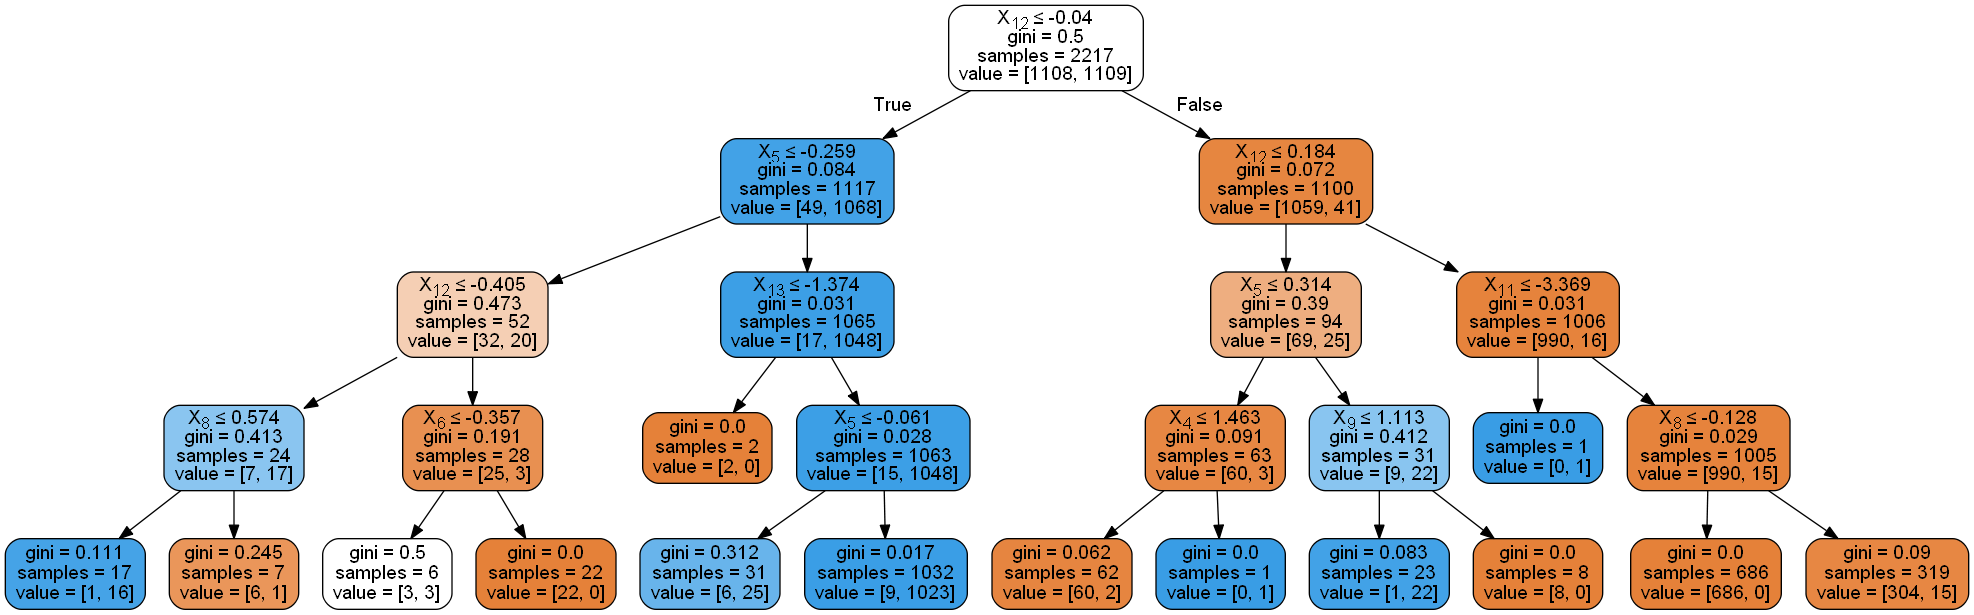

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics


data = pd.read_csv("voiceDataSet.csv")
data.head()

class_mapping = {label: idx for idx, label in enumerate(np.unique(data['label']))}
print(class_mapping)

data['label'] = data['label'].map(class_mapping)

from sklearn.model_selection import train_test_split

X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)
					 
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

tree = DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train_std, y_train)

print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_std, y_test)))

y_pred_tree = tree.predict(X_test_std)
print("Predicted value: ",y_pred_tree)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_tree, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

data_new = pd.read_csv("voiceSamples.csv")
data_new.head()

X1, y1 = data_new.iloc[:, :-1].values, data_new.iloc[:, -1].values

stdsc = StandardScaler()
X1_std = stdsc.fit_transform(X1)

y1_pred_tree = tree.predict(X1_std)

print("TRee",y1_pred_tree)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())